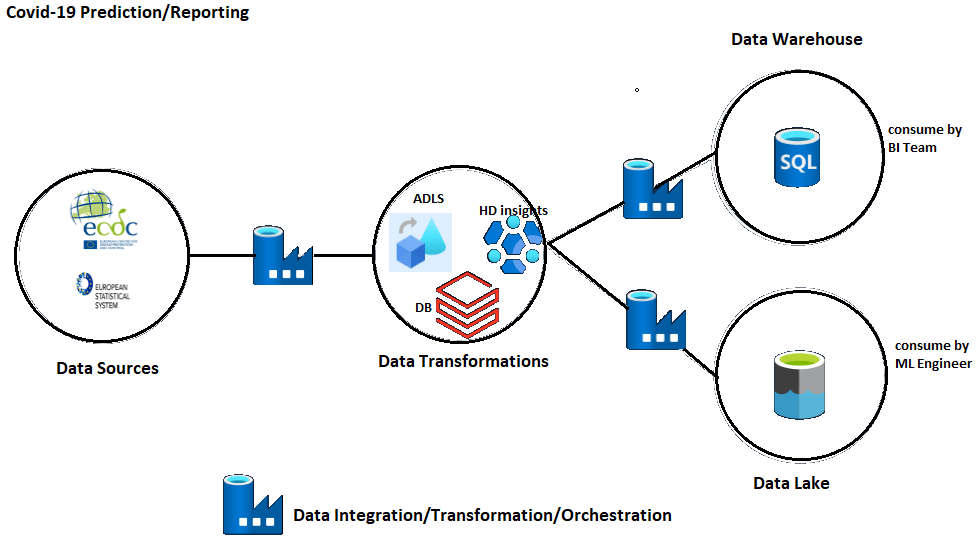

In [1]:
from IPython.display import Image
Image('./img/adf1.png')

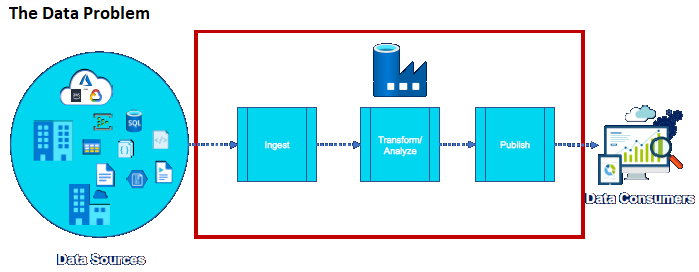

In [2]:
from IPython.display import Image
Image('./img/adf2.png')

## Azure Data Factory Overview
<b>What is Azure Data Factory</b>
- A fully managed, serverless data integration solution for ingesting,
preparing and transforming all of your data at scale.

<b>🚧 The Problem ADF Solves</b>
- Businesses generate enormous volumes of data daily.
- Data comes from various sources: multi-cloud, on-premises, SaaS apps.
- Arrival frequency varies: near-real-time or scheduled batch loads.
- Data types include structured, semi-structured, and unstructured formats.
- Quick and consistent ingestion + processing is essential to gain insights.
- Traditional data integration tools struggle due to:
  - Lack of connectors
  - Poor scalability
  - High management overhead


<b>✅ Azure Data Factory Capabilities</b>

<b> 🔌 Data Ingestion</b>
- Connectors for 90+ sources (and growing)
  - SaaS: Salesforce, Office 365
  - Cloud: Amazon S3, Google Cloud Storage
  - On-prem: SQL Server, Oracle, SAP

<b> 🔄 Data Transformation</b>
- Built-in transformation options (code-free interface)
- If complex logic needed: use **Azure Databricks** or **HDInsight**
- ADF supports orchestration of external Spark jobs

<b> 🤖 ML Integration</b>
- Orchestrate ML pipelines in Azure ML or Databricks

<b> 📊 Dashboard Publishing</b>
- Supports Power BI dashboard publishing orchestration

<b> 🔁 End-to-End Orchestration</b>
- Control flow, activities, dependencies, and scheduling
- Built-in Monitoring & Alerting

<b> 🧩 Definition Breakdown</b>

| Term | Meaning |
|------|---------|
| **Fully Managed** | No need to manage VMs, OS, scaling — Microsoft handles it |
| **Serverless** | Auto-scale compute on demand without provisioning |
| **Data Integration** | Pull from diverse sources — cloud, on-prem, SaaS |
| **Ingest, Prepare, Transform** | End-to-end pipeline flow |
| **At Scale** | Scales elastically for enterprise-grade workloads |


## Project Overview
<b> 🔹 Project Introduction
In this course, we will build a data platform to support:
1. Prediction of COVID-19 spread using machine learning (handled by data scientists later).
2. Reporting COVID-19 trends using a BI tool like Power BI.

We will develop a data ingestion, transformation, and orchestration pipeline using Azure Data Factory (ADF) with a focus on European Union (EU) and UK data sources.

🔹 Data Sources
- COVID-19 Cases Data: From ECDC (European Centre for Disease Prevention and Control).
- Population Data: From Eurostat.
    - Stored in Azure Blob Storage (simulating internal shared datasets).

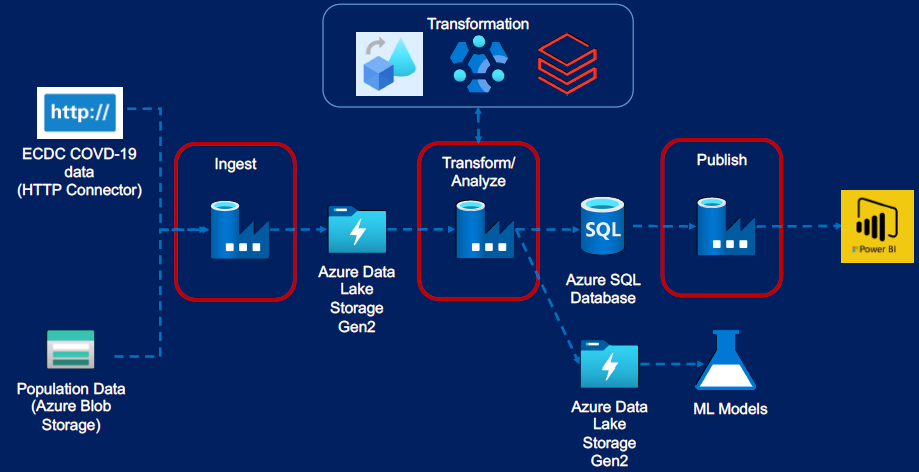

In [3]:
from IPython.display import Image
Image('./img/adf18.png')

## 🔹 Data Sources & Ingestion
- COVID-19 Cases (ECDC Website) 
- Ingested using **HTTP connector** in ADF.  

- **Population Data (Eurostat)**  
  - Stored in **Azure Blob Storage**.  
  - Ingested from Blob into Data Lake.  
  - Shows usage of **Blob connector** instead of HTTP.

## 🔹 Data Storage
- **Azure Blob Storage**: Used for raw curated population data.  
- **Azure Data Lake Storage Gen2**: Main Data Lake for storing raw + transformed data.  
  - Enterprise-grade, supports petabytes and high throughput.  
  - Built on Blob → cost effective with better security.  
  - Mountable to Databricks, Hadoop, Synapse.  
- **Azure SQL Database**: Target for processed data (subset for reporting).  
  - Chosen instead of Synapse because of small dataset size.  
  - Synapse can be swapped if scaling required.

## 🔹 Transformation Tools
ADF supports multiple transformation approaches:

1. **ADF Data Flows**  
   - Code-free, GUI-based.  
   - Best for **simple to medium complexity** transformations.  
   - Limited for advanced transformations.  

2. **HDInsight**  
   - Write transformations in **Hive SQL**, **Pig scripts**, or **Spark**.  
   - More flexible, but requires coding.  

3. **Azure Databricks**  
   - Transformations in **Python, Scala, Spark SQL**.  
   - Highly scalable, best for complex ML/data science workloads.

## 🔹 Orchestration with ADF
- Ingestion (HTTP, Blob, etc.)
- Transformations (Data Flows, HDInsight, Databricks)
- Load into Data Lake & SQL DB

<b> Why ADF?</b>
- Large set of connectors (current & future expandability).  
- Workflow orchestration across multiple services.

<b> Reporting </b>
- **Power BI** is connected to Azure SQL Database.  
- Used for dashboards & reports.  
- Rich visualization features.  
- Focus of this project is **ADF** → Power BI is a quick overview only.

<b> Solution Architecture – High Level </b>
1. **Data Ingestion**  
   - COVID-19 Data → ADF (HTTP) → Data Lake  
   - Population Data → Blob → ADF → Data Lake  

2. **Transformation**  
   - Simple → ADF Data Flows  
   - Advanced → HDInsight/Databricks  

3. **Storage**  
   - All transformed data → Azure Data Lake Gen2  
   - Subset → Azure SQL Database (for reporting)  

4. **Consumption**  
   - Power BI dashboard built on SQL DB
  


<b>Key Factors to Consider</b>

1. Structure of the data
- Structured
- Semi-Structured
- Unstructured

2. Operational Needs
- How often is the data accessed?
- How quickly do we need to serve?
- Need to run simple queries?
- Need to run heavy analytical workload?
- Accessed from multiple regions?

## Azure Databases
<b>1. Relational Databases (SQL-based) : These are for structured data (tables, rows, relationships).</b>

a. Azure SQL Database
- Fully managed relational database in the cloud.
- Based on Microsoft SQL Server engine.
- Best for OLTP (transactional workloads).
- Features: automatic backups, scaling, high availability.
- Example: Banking transactions, e-commerce orders.

b. Azure SQL Managed Instance
- Managed SQL Server instance with more compatibility for on-prem SQL Server features.
- Easier for “lift-and-shift” migrations.
- Example: Moving entire on-prem SQL Server DBs to cloud with minimal changes.

c. Azure Database for MySQL
- Managed MySQL database service.
- Open-source SQL engine, good for web apps.
- Example: WordPress, e-commerce apps.

d. Azure Database for PostgreSQL
- Managed PostgreSQL service.
- Popular for advanced analytics and JSON data handling.
- Example: Data-heavy web apps, analytics platforms.

e. Azure Database for MariaDB (being retired, PostgreSQL/MySQL are recommended).

<b>2. Non-Relational (NoSQL Databases): For unstructured or semi-structured data (JSON, key-value, documents).</b>

a. Azure Cosmos DB
- Globally distributed, multi-model database.
- Supports key-value, document, column-family, and graph data models.
- Very low latency (<10 ms), high throughput.
- Example: IoT telemetry, e-commerce product catalogs, social media feeds.

b. Azure Table Storage
- Key-value store for large-scale, non-relational data.
- Cheaper but less feature-rich compared to Cosmos DB.
- Example: Logs, metadata, user profile info.

<b>3. Big Data & Analytics Databases : Optimized for data warehousing and analytics.</b>

a. Azure Synapse Analytics (formerly SQL Data Warehouse)
- Massively Parallel Processing (MPP) system for large data warehouses.
- Can run complex queries across billions of rows quickly.
- Example: Enterprise reporting, data lakehouse solutions.

b. Azure Data Explorer (ADX / Kusto)
- Optimized for real-time analytics on large volumes of data (like logs, telemetry, events).
- Example: Monitoring apps, security logs, IoT analytics.

<b>4. Specialized Databases :</b>

a. Azure Cache for Redis
- In-memory data store for ultra-fast data retrieval.
- Example: Caching, session storage, gaming leaderboards.

b. Azure Database Migration Service
- Helps migrate on-prem databases (SQL, Oracle, MySQL, PostgreSQL) to Azure.

<b>Note: When to use what</b>
- Transactional apps (OLTP): Azure SQL DB, PostgreSQL, MySQL.
- Analytics (OLAP): Azure Synapse Analytics.
- Unstructured/Global scale apps: Cosmos DB.
- Caching/real-time performance: Redis.
- Log/telemetry analysis: Data Explorer.

## Azure Storage Accounts

An **Azure Storage Account** is a cloud storage solution that provides a unique namespace in Azure to store and access data.
- Globally unique name (like `mystorageaccount.blob.core.windows.net`).
- Stores **different types of data**: blobs, files, queues, tables, disks.
- **Secure, highly available, durable, and scalable**.

#### Types of Storage

<b> 1. **Blob Storage**
- Stores unstructured data (text, images, videos, backups).
- Types of blobs:
  - **Block Blob** → Best for text/binary (documents, media).
  - **Append Blob** → Best for logs (data added to the end).
  - **Page Blob** → Best for virtual hard disks (Azure VM disks).
- Example: Store raw COVID data files, images, reports.

<b> 2. **File Storage (Azure Files)**
- Fully managed **file shares** in the cloud.
- Accessible via **SMB** or **NFS** protocols.
- Example: Shared folder for team documents.

<b> 3. **Queue Storage**
- Messaging store for reliable communication.
- FIFO (First In, First Out).
- Example: Web app pushes messages, background service processes them.

<b> 4. **Table Storage**
- NoSQL key-value store for structured data.
- Highly scalable.
- Example: IoT device metadata or user profiles.

<b> 5. **Disk Storage**
- Persistent block-level storage for Azure VMs.
- Types:
  - HDD (cheap, slower).
  - SSD (Standard/Premium) → High performance.
- Example: VM OS disk or DB storage.

<b> Performance Tiers</b>
- **Standard** → HDD, cheaper, good for infrequent access.
- **Premium** → SSD, low latency, high throughput.

<b> Redundancy Options (Replication)</b>
1. **LRS (Locally Redundant Storage)** → 3 copies in one region.
2. **ZRS (Zone Redundant Storage)** → Copies across 3 availability zones.
3. **GRS (Geo-Redundant Storage)** → Secondary region for disaster recovery.
4. **RA-GRS (Read-Access Geo-Redundant)** → Same as GRS + read access to secondary.

<b> When to Use Each</b>
- **Blob Storage** → Data lakes, backups, media files.
- **File Storage** → Shared drives for apps/VMs.
- **Queue Storage** → Message passing between systems.
- **Table Storage** → Fast access to NoSQL structured data.
- **Disk Storage** → Persistent VM & DB storage.

<b> In **ADF projects** like the COVID-19 pipeline:</b>
- **Population data** → Blob Storage.
- **Raw + transformed data** → Data Lake (on Blob).
- **Analytics/reporting** → SQL Database.

<b> Solution Architecture overview</b>

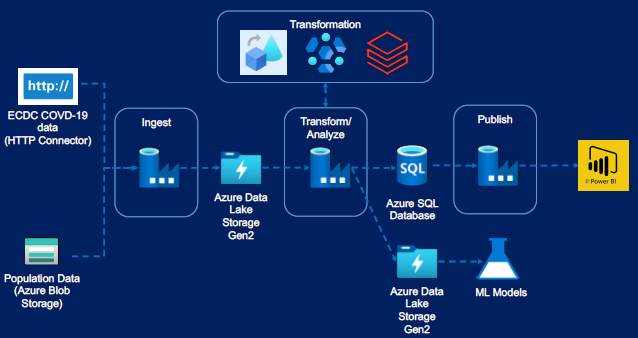

In [11]:
from IPython.display import Image
Image('./img/adf3.png')

<b> 🔹 Technology Choices
| Component                    | Technology Used                   | Reason                                                        |
| ---------------------------- | --------------------------------- | ------------------------------------------------------------- |
| Orchestration                | Azure Data Factory                | Rich connectors, visual pipeline creation, hybrid support     |
| Ingestion                    | ADF HTTP, Blob connectors         | Covers both web and internal shared file sources              |
| Transformation               | Data Flows, HDInsight, Databricks | To showcase various transformation options in Spark ecosystem |
| Data Storage (Raw & Curated) | Azure Data Lake Storage Gen2      | Scalable, secure, enterprise-grade data lake                  |
| Reporting Store              | Azure SQL Database                | Easy to query; using instead of Synapse for simplicity        |
| Visualization                | Power BI                          | Rich visualization tool; minor focus here                     |

<b> 🔹 Transformation Technologies Compared
| Tool          | Type              | Strengths                               | Limitations                      |
| ------------- | ----------------- | --------------------------------------- | -------------------------------- |
| ADF Data Flow | Code-free         | Easy to use, good for medium complexity | Not ideal for very complex logic |
| HDInsight     | Spark/Hive/Pig    | Flexible, legacy big data tool          | Heavier to manage                |
| Databricks    | Spark + Notebooks | Collaborative, powerful, scalable       | Requires coding                  |

<b> 🔹 Data Storage Details
- Blob Storage: For storing curated population data from Eurostat.
- ADLS Gen2: Main data lake for raw and transformed COVID datasets.
- SQL DB: For reporting use cases, small to medium scale.
- Synapse Analytics (Optional): Use if dataset grows large.

<b> 🔹 Power BI Reporting
We will briefly connect Power BI to Azure SQL DB to build a COVID-19 trend dashboard. The focus remains on data pipeline, not deep Power BI.

Lecture: Project Overview
- ECDC Website for Covid-19 Data - https://www.ecdc.europa.eu/en/covid-19/data
- Euro Stat Website for Population Data - https://ec.europa.eu/eurostat/estat-navtree-portlet-prod/BulkDownloadListing?file=data/tps00010.tsv.gz

Lecture: Azure Storage Solutions
- Introduction to Azure Storage services - https://docs.microsoft.com/en-us/azure/storage/common/storage-introduction
- Azure SQL Database - https://docs.microsoft.com/en-us/azure/azure-sql/database/sql-database-paas-overview
- Azure Synapse Analytics - https://docs.microsoft.com/en-us/azure/synapse-analytics/overview-what-is
- Azure Cosmos DB - https://docs.microsoft.com/en-us/azure/cosmos-db/introduction
- Azure Data Lake Storage Gen2 - https://docs.microsoft.com/en-us/azure/storage/blobs/data-lake-storage-introduction



#### 🏗️ 12. Creating a Data Factory Resource via Azure Portal

<b> 🔹 Step 1: Navigate to Azure Portal

- Open [https://portal.azure.com](https://portal.azure.com)
- Click the **☰ menu (top-left)** → **Create a resource**
- In the **Marketplace**, search for **Data Factory**
- Click **Create**

<b> 🔹 Step 2: Fill Out Data Factory Form

| Field | Value |
|-------|-------|
| **Subscription** | Your active subscription (e.g., Free Trial) |
| **Resource Group** | `covid-reporting-rg` *(create new)* |
| **Region** | Closest to you (e.g., UK South) |
| **Name** | `covid-reporting-adf` |
| **Version** | V2 (V1 is deprecated) |

Click **Next** to continue to Git configuration.

<b> 🔹 Step 3: Git Configuration

- Choose **Configure Git later** (we will not integrate Git in this tutorial).
- Click **Next** to move to **Networking**.
- Accept default networking settings.
- Click **Next** for **Tags** → (Skip or add optional tags)
- Click **Review + Create**.
- Once validation passes, click **Create**.

<b> 🔹 Step 4: Post Deployment

- Once deployment finishes (~a few seconds), click **Go to Resource**.
- You’ll see options like:
  - **Access Control (IAM)**
  - **Networking**
  - **Monitoring**
- The main entry point is **Author & Monitor** → This opens ADF Studio.
- Inside ADF Studio:
  - **Author**: Build pipelines
  - **Monitor**: View runs, trigger history
  - **Manage**: Linked services, triggers, etc.

> 📘 Tip: Visit documentation directly using **"Documentation" link** inside portal.

<b> 📌 Step 5: Pin Resource to Dashboard

- Click the **📌 Pin icon** to pin your Data Factory to a dashboard
- Create a new dashboard named: `Covid Reporting Project`
- Click **Create and Pin**
- Access via: ☰ → **Dashboard** → Choose `Covid Reporting Project`
- All related resources will be pinned here for easy access 🎯

## 💾 13. Creating an Azure Storage Account via Azure Portal
<b> 🔹 Step 1: Go to Azure Portal
- Open [https://portal.azure.com](https://portal.azure.com)
- Click the **☰ menu (top-left)** → **Create a resource**
- In the **Marketplace**, search for **Storage Account**
- Click **Create**

<b> 🔹 Step 2: Configure the Storage Account

| Field | Value |
|-------|-------|
| **Subscription** | Pay-As-You-Go (or your active one) |
| **Resource Group** | `covid-reporting-rg` |
| **Storage Account Name** | `covidreportingsa` *(lowercase, 3–24 characters)* |
| **Region** | Closest to you (e.g., UK South) |
| **Performance** | Standard *(HDD-backed, cost-effective)* |
| **Replication** | LRS *(Locally Redundant Storage – basic & cheapest)* |

> 💡 **Naming Tip**: Use meaningful names. Example: `covidreportingsa`
- `covidreporting` → project name
- `sa` → storage account

Click **Next** through Advanced, Networking, Data Protection, and Encryption.
Accept **default settings** for all.
Skip **Tags** or use them optionally.
Click **Review + Create** → After validation → Click **Create**

<b> 🔹 Step 3: Explore the Storage Account
- Once deployment completes, click **Go to Resource**
- You’ll see sections like:
  - **Access Control (IAM)**: Assign RBAC roles
  - **Access Keys**: Two keys auto-generated (`key1`, `key2`) → Can be used in apps or rotated
  - **Data storage**:
    - **Containers** (for blobs)
    - **File shares** (for SMB)
    - **Queues** and **Tables**
- You can use **Storage Browser** (Web UI) or download **Azure Storage Explorer (Desktop)** for advanced operations *(next lesson)*

<b> 📌 Step 4: Pin Storage Account to Dashboard
- Click 📌 **Pin** icon
- Add to existing dashboard: `Covid Reporting Project`
- Navigate via **☰ → Dashboard → Covid Reporting Project** to quickly access all resources

## 14. Installing Azure Storage Explorer

## 15. Creating Azure Data Lake Storage Gen2

<b>1. Create ADLS Gen2</b>
- Go to Azure Portal → Create a resource → Storage account.

<b> 2. Configure the Storage Account

| Field | Value |
|-------|-------|
| **Subscription** | Pay-As-You-Go (or your active one) |
| **Resource Group** | `covid-reporting-rg` |
| **Storage Account Name** | `covidreportingdl` *(lowercase, 3–24 characters)* |
| **Region** | Closest to you (e.g., UK South) |
| **Performance** | Standard *(HDD-backed, cost-effective)* |
| **Replication** | LRS *(Locally Redundant Storage – basic & cheapest)* |

- Enable Hierarchical Namespace ✅ (this makes it Data Lake Gen2)
- Click Review + Create.

## 🗃️ 16. Creating an Azure SQL Database via Azure Portal
<b> 1. **Navigate to Azure Portal**
- Go to [https://portal.azure.com](https://portal.azure.com)
- Click on **Create a resource** from the top-left menu
- Search for **SQL Database** and click **Create**

<b> 2. **Basic Settings**
- **Subscription**: Select your active subscription (e.g., Pay-As-You-Go)
- **Resource Group**: Use existing `covid-reporting-rg`
- **Database Name**: `covid-db`
- **Server**: Click **Create new**
  - Name: `covid-srv`
  - Region: Closest to your location (e.g., UK South)
  - Auth: SQL Authentication
    - Username: `adm`
    - Password: `********`

<b> 3. **Configure Compute + Storage**
- **Service Tier**: Basic (DTU-based)
- **Cost**: ~£4.56/month (subject to local currency)
- **Storage**: 2 GB
- **Tier Summary**:
  - DTU = Database Transaction Unit (includes CPU, Memory, IOPS)
 
<b> 4. **Networking**
- **Connectivity**: Public endpoint
- **Allow Azure Services**: Yes
- **Add Current IP to Firewall**: Yes

<b> 5. **Backup**
- Choose **Locally Redundant Storage (LRS)** for lower cost

<b> 6. **Review + Create**
- Validate settings
- Click **Create**
- Deployment takes ~10 minutes

<b> ✅ Navigate to SQL DB
- Click **Go to Resource**
- Confirm:
  - DB Name: `covid-db`
  - Server: `covid-srv`
  - Pricing Tier: Basic
  - Storage: 2 GB

<b> 🛠️ Query Editor
- Go to **Query Editor** under the SQL DB resource
- Authenticate with SQL credentials
- Example Query:
  ```sql
    SELECT * FROM sys.objects;
  ```

<b> 🔧 Recommended Tools for SQL Work
- **Azure Data Studio** (Cross-platform)
- **SQL Server Management Studio (SSMS)** (Windows only)

## 17. Install Azure Data Studio

- https://azure.microsoft.com/en-us/products/storage/storage-explorer
- https://learn.microsoft.com/en-us/azure-data-studio/download-azure-data-studio?view=sql-server-ver16%5C&tabs=win-install%2Cwin-user-install%2Credhat-install%2Cwindows-uninstall%2Credhat-uninstall

## Section 4. Data Ingestion from Azure blod storage to Azure Data Lake(copy activity)

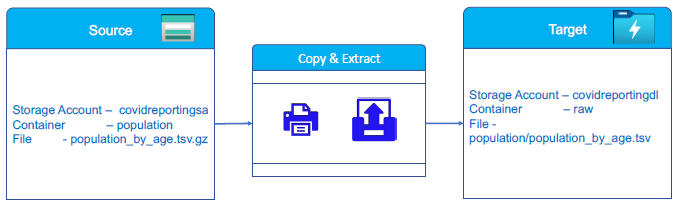

In [12]:
from IPython.display import Image
Image('./img/adf4.png')

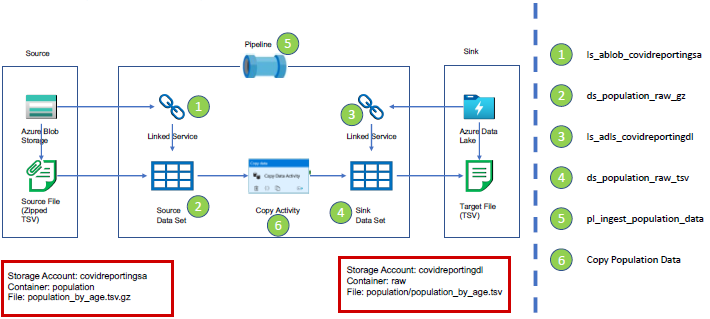

In [14]:
from IPython.display import Image
Image('./img/adf5.png')

<b> Step 1. Create Source Container in Blob Storage and Upload File</b>
- Go to the **Azure Portal**.
- Open your **Storage Account** (`covidreportingsa`) from the Dashboard or All Resources.
- Navigate to `Storage browser` → `Blob containers`.
- Click **+ Container**, name it `population`, and set access level to `Private`.
- Click into the container `population` and click **Upload**.
- Browse and upload the file `population_by_age.tsv.gz`.

<b> 2. Create Sink Container (Azure Data Lake)</b>
- Go back to Dashboard → Open your Data Lake Storage Account (`covidreportingdl`).
- Navigate to `Storage browser` → `Blob containers`.
- Click **+ Container**, name it `raw`.
- Set access level to `Private` and click **Create**.

<b>Step 2: Create Linked Services in Azure Data Factory</b>
Navigate to **Manage** (wrench icon on the left side) → **Linked Services** → **New**:

<b> 1. Azure Blob Storage Linked Service(ls_ablob_covidreportingsa)
- Type: Azure Blob Storage, Connect Via Integration Runtime : AutoResolveIntegrationRuntime
- Authentication: Account Key, connection String 
- Account Selection method: From Azure Subscription
- Storage Account: `covidreportingsa`
- Test Connection → Create

<b> 2. Azure Data Lake Gen2 Linked Service(ls_adls_covidreportingdl) 
- Type: Azure Data Lake Gen2, Connect Via Integration Runtime : AutoResolveIntegrationRuntime
- Authentication: Account Key
- Account Selection method: From Azure Subscription
- Storage Account: `covidreportingdl`
- Test Connection → Create

<b>Step 3: Create Datasets </b> Navigate to **Author** (pencil icon) → **Datasets** → **New Dataset**.
<b> 1. Source Dataset (Blob Storage)
- Format: DelimitedText
- Name: `ds_population_raw_gz`
- Linked Service: `ls_ablob_covidreportingsa`
- File Path: `/population/population_by_age.tsv.gz`
- Compression: GZip (Optimal)
- Column Delimiter: Tab (`\t`)  
- First row as header: Enabled

> You can use "Preview Data" to confirm headers and schema.

<b> 2. Sink Dataset (Data Lake Gen2)
- Format: DelimitedText
- Name: `ds_population_raw_tsv`
- Linked Service: `ls_adls_covidreportingdl`
- File Path: `/raw/population_by_age.tsv`
- Compression: None
- Column Delimiter: Tab (`\t`)
- First row as header: Enabled

> No preview available as file doesn't exist yet.

<b> Validate and Publish</b>
- Click on **Validate All** to check for issues in Linked Services or Datasets.

<b> Publish Changes </b>
Click on **Publish All** to save changes to the Data Factory.
Until you publish, your datasets and pipelines exist only temporarily in the UI.

<b> Step4 :  Create a New Pipeline</b>
- Go to **Author** tab in ADF Studio.
- Click on the three dots next to Pipelines → **New Pipeline**.
- On the right, name your pipeline as `pl_ingest_population_data` and provide an optional description.
- Set **Concurrency** to `1` (or more if parallel runs are needed).

<b> 2. Add a Copy Data Activity</b>
- Expand **Move & Transform** in the Activities pane.
- Drag **Copy data** to the central canvas.
- Select the activity to configure:
  - Name the activity (e.g., `Copy Population Data`).
  - Set timeout to `5 minutes`.
  - Retry: `0` (or higher with interval).
  - Secure Output/Input: Enable if sensitive data is involved.

<b> 3. Configure the Source and Sink Datasets</b> 
- Click the **Source** tab on the activity.
- Choose the dataset (e.g., `ds_population_raw_gz`).
- Advanced options can be skipped unless required.
- Click the **Sink** tab.
- Choose the output dataset (e.g., `ds_population_raw_tsv`).
- Ensure the folder path is correctly set (e.g., `raw/population/`).

<b> 5. Mapping (Optional)</b>
- Use **Mapping** only if you're transforming field names/structures.
- If simply copying files (binary/flat), skip this step.

<b> 6. Validate and Debug</b>
- Click **Validate All** to check for errors.
- Click **Debug** to test-run the pipeline.
- Check **Output** pane → view **Details** tab for runtime and file info.

<b> 7. Verify Output in Azure Storage Explorer</b>
- Open **Azure Storage Explorer**.
- Login with Azure credentials → find the **sink storage account**.
- Navigate to `raw/population/` → download the file.
- Check contents in any text editor (e.g., VS Code, Notepad++).

<b> 8. Publish the Pipeline</b>
- Click **Publish All** in the top bar to commit changes to ADF.
- Your pipeline is now saved and ready to trigger manually or via schedule.

#### Scenario 1  : Execute Copy Activity when the file becomes available by **Validation Activity**
- Source system makes data available **daily**, but at **unknown times**.
- Requirement: Process the data **as soon as it arrives**.
- Solution: Use **Validation Activity** in ADF pipelines to check for file existence before proceeding.

<b>🛠️ Steps in ADF</b>
1. **Schedule the Pipeline**
   - Example: Run pipeline **every day at midnight**.
   - But pipeline must **wait for the file** to be available before continuing.

2. **Add Validation Activity**
   - Drag **Validation** activity from *General* category into the pipeline.
   - Rename it (e.g., `Check if file exists`).

3. **Configure Validation Activity (Settings):**
- **Dataset**: Select dataset that points to expected file (e.g., `ds_population_raw_gz`).
- **Timeout**: Max duration to wait for the file.
  - Example: `1.00:00:00` → wait **1 day**.
- **Sleep**: Interval between checks.
  - Example: `600` seconds → check every 10 minutes.
- **Minimum Size (Bytes)**: Ensures file isn’t partially written.
  - Example: `1024` → wait until file size ≥ 1 KB.
 
<b> 🔗 Control Flow Connections</b>
- **On Success** → Connect Validation to **Copy Activity**.
- **On Failure** → Optional, trigger alerts/notifications (e.g., send email).

<b>🧪 Testing Scenarios</b>
1. **File Missing** → Validation fails after timeout.
2. **File Uploaded Late** → Validation succeeds once file arrives.
3. **File Too Small** → Validation waits until file size condition is met.

#### Scenario 2: Execute Copy Activity only if file contents are expected Control Flow Activities - Get Metadata, If condition, Web Activities

<b>1. Get Metadata Activity</b>
- Add **Get Metadata** activity after Validation and name it `Get File Metadata1`.
- **Dataset tab** `ds_population_raw_gz`.
- In **Field List**, select:
    - columnCount → check no. of columns
    - exists → confirm file presence
    - size → optional, useful for debugging

<b>2. If Condition Activity</b>
- Add If Condition after Get Metadata. Name : `if column count matches`
- **Activities tab**
  - Expression : `@equals(activity('Get File Metadata1').output.columnCount, 13)`
  - If True branch → proceed to add your Copy Activity.
  - If False branch → handle error (send email/raise failure).

<b>3. Error Handling (False branch)</b>
- Add Web Activity in False branch to send notification.
- Can call a Logic App or Azure Function that sends an email alert (recommended).
- Alternatively → you can deliberately fail the pipeline using a dummy URL (as shown in your walkthrough).

## Scenario 3: Move File in Azure Data Factory

In this lesson, we are going to implement a scenario where the file should be deleted from the source location **after** it has been successfully copied to the destination. 

This effectively becomes a **move operation** (copy + delete).

<b> Problem</b>
- ADF does **not have a built-in Move activity**.
- We need to first copy the file → then delete it → to simulate a move.

<b>Steps</b>
1. Create a **Copy Activity** to copy the file from source to Data Lake.
2. Add a **Delete Activity** after the Copy succeeds.
3. Configure Delete activity:
   - Dataset = Source file dataset (e.g., `DS_population_raw_gz`).
   - Recursive delete (if folder-level deletion is required).
   - Optional logging.
4. Make Delete activity **dependent** on Copy activity.
5. Debug pipeline to validate the file is moved.

// ADF Expression (dependency)
@activity('Copy Data').status == 'Succeeded'

<b>Example Pipeline Flow</b>
- If condition (validation passed)
   - Copy Activity (Blob → Data Lake)
   - Delete Activity (Blob source file)

The **Delete Activity** will only run if the Copy activity succeeds.

<b>## ADF File Validation Pipeline

This notebook documents the setup for validating a file using ADF activities like `Get Metadata`, `If Condition`, and `Web Activity`.

<b> Step 1: Get File Metadata
Use the `Get Metadata` activity to extract file-level properties.


<b><b><b># Pseudocode: ADF metadata activity configuration
{
  "name": "Get File Metadata",
  "type": "GetMetadata",
  "dataset": "InputGzipDataset",
  "fieldList": [
    "exists",
    "size",
    "columnCount"
  ]
}

<b> Step 2: Conditional Check
Use `If Condition` activity to verify if the column count is 13.


<b><b><b># Pseudocode: If Condition expression in ADF
{
  "name": "If Column Count Matches",
  "type": "IfCondition",
  "expression": {
    "value": "@equals(activity('Get File Metadata').output.columnCount, 13)"
  },
  "ifTrueActivities": ["Copy Data Activity"],
  "ifFalseActivities": ["Send Email Web Activity"]
}

<b> Step 3: Copy Activity
The copy activity runs only if the condition is met.


<b> Pseudocode: Copy activity under IfCondition -> True
{
  "name": "Copy Data to DataLake",
  "type": "Copy",
  "inputs": ["InputGzipDataset"],
  "outputs": ["SinkDataset"]
}

<b> Step 4: Web Activity for Notification
Sends an email or triggers Logic App if file is invalid.


<b> Pseudocode: Web Activity on failure
{
  "name": "Send Email",
  "type": "WebActivity",
  "method": "POST",
  "url": "https://dummy-url.com/notify",
  "body": {
    "message": "File validation failed. Column count mismatch."
  }
}

<b> Final Step: Publish Pipeline
Ensure to validate and publish your pipeline after making changes.

<b>## Introduction

In this lesson, we are going to discuss the third scenario — moving a file instead of copying it by using a Copy Activity followed by a Delete Activity in Azure Data Factory (ADF).

<b> Move Operation Using Delete Activity

ADF does not have a native 'Move' activity. However, a move can be achieved by chaining a Delete Activity after a successful Copy Activity.

Steps to achieve this:
1. Add a Delete Activity under the 'If Condition' for the true case.
2. Set the dataset for the Delete Activity.
3. Configure options like recursive delete or logging, if required.
4. Link the Copy Activity to the Delete Activity using success dependency.

<b> Debug and Verification

Run a debug of the pipeline and confirm that:
- The file is successfully copied.
- The file is deleted from the source after the copy.
- All activities show a successful status in Monitor.

<b> Introduction to Triggers

ADF offers three types of triggers:
1. Schedule Trigger
2. Tumbling Window Trigger
3. Event-Based Trigger

Each has specific use-cases:
- Schedule: Runs on a calendar schedule.
- Tumbling Window: Best for fixed time slices.
- Event-Based: Reacts to file creation or deletion in storage.

<b> Creating Schedule Trigger

To create a Schedule Trigger:
1. Navigate to Manage > Triggers > New.
2. Choose 'Schedule' type.
3. Define recurrence, times (e.g., 10:00 AM, 2:00 PM), and time zone (UTC).
4. Attach to one or multiple pipelines.

<b> Creating Tumbling Window Trigger

Steps:
1. Define a start time (can be in the past).
2. Set recurrence (e.g., hourly, daily).
3. Configure delay, concurrency, retry policy, and optional dependencies.
4. Note: One Tumbling Window Trigger = One Pipeline.

<b> Creating Event-Based Trigger

Steps:
1. Select Subscription and Storage Account.
2. Define Container and Blob path or name.
3. Choose trigger condition: Blob Created/Deleted.
4. Register 'Microsoft.EventGrid' Resource Provider in Azure Portal.
5. Activate trigger or save in paused state.


<b> Attaching Trigger to Pipeline

To attach:
1. Open pipeline and click 'Add Trigger' > 'New/Edit'.
2. Select the previously created trigger.
3. Publish all changes to enable the trigger.

<b> Testing Event Trigger

- After attaching, upload the expected file to the source container.
- ADF will detect the new file and run the pipeline.
- Check execution success in Monitor > Trigger Runs and Pipeline Runs.

<b> Monitor Dashboard Overview

- Dashboard shows counts of pipeline/trigger/activity executions.
- Tabs: Pipeline Runs, Trigger Runs, Integration Runtimes.
- Filters: Time, Status, Trigger Type (Schedule, Tumbling, Event).
- Alerts: Can be created for success/failure notifications.


## Section 5 : Data Ingestion From HTTP

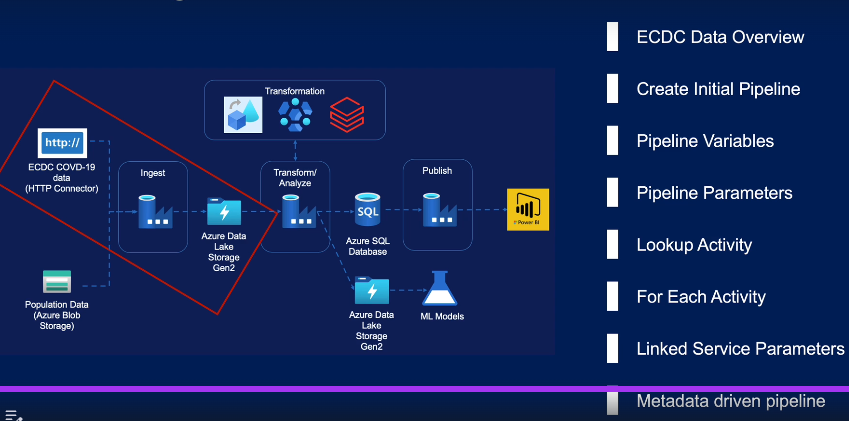

In [1]:
from IPython.display import Image
Image('./img/adf19.png')

- https://github.com/cloudboxacademy/covid19/blob/main/raw/main/ecdc_data/cases_deaths.csv
- https://opendata.ecdc.europa.eu/covid19/nationalcasedeath/csv

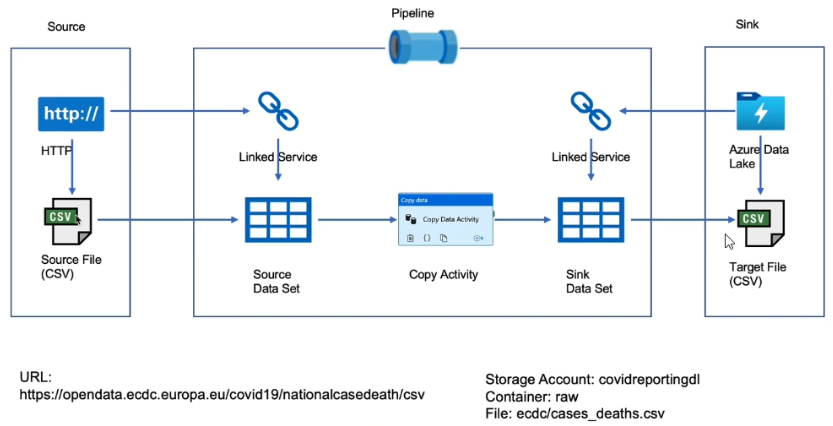

In [3]:
from IPython.display import Image
Image('./img/adf20.png')

Azure Key Vault (KV) is a secure service in Azure where you store sensitive values like:
- API Client ID
- API Client Secret
- Access tokens
- Database/Snowflake usernames & passwords
- Storage account keys

Why store API credentials in Key Vault?
- Security → Secrets are never exposed in plain text inside ADF.
- Centralized management → If a key/secret changes, you update it in one place (Key Vault).
- Access control → You can use Azure RBAC to control who can view/update secrets.
- Automatic rotation → Some secrets (like passwords) can be rotated automatically.

In [ ]:
1. Store API Credentials in Key Vault
- Save Client ID and Client Secret in Azure Key Vault.
- Link Key Vault to ADF for secure access.